In [22]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [23]:
"""
# B.
def border_swap(problem, next_gen, child, schedule):
    if schedule is None:
        print("order is none.")
        return next_gen
    if len(next_gen) == 0:
        next_gen.append(child)
    else:
        for i in schedule:
            if schedule[i] == -1 and i < len(schedule) - 1:
                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]
        temp_schedule = [i for i in schedule if i != -1]
        #if problem.eval_fitness(temp_schedule) > problem.eval_fitness(child):
        next_gen.append(temp_schedule)
    return next_gen
"""

'\n# B.\ndef border_swap(problem, next_gen, child, schedule):\n    if schedule is None:\n        print("order is none.")\n        return next_gen\n    if len(next_gen) == 0:\n        next_gen.append(child)\n    else:\n        for i in schedule:\n            if schedule[i] == -1 and i < len(schedule) - 1:\n                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]\n        temp_schedule = [i for i in schedule if i != -1]\n        #if problem.eval_fitness(temp_schedule) > problem.eval_fitness(child):\n        next_gen.append(temp_schedule)\n    return next_gen\n'

In [24]:
import mlrose_hiive as mh

In [25]:
#help(mh.runners)

In [26]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [27]:
import pandas as pd
import utility as u
import importlib

In [28]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [29]:
size = 18
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [30]:
"""
with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)
"""

'\nwith open(f"{size}_tasks.txt", "a") as f:\n    for t in tasks:\n        print(t.task_id, t.duration, t.deadline, t.profit, file=f)\n'

In [31]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [32]:
problem_ffp.length

18

In [33]:
problem_ffp.fitness

238.0

In [34]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [35]:
df_run_curves_ffp.shape

(5003, 7)

In [36]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001817,214.0,0.0,40,0.07,2048
1,1,0.020249,285.0,2.0,40,0.07,2048
2,2,0.039457,285.0,3.0,40,0.07,2048
3,3,0.057556,289.0,5.0,40,0.07,2048
4,4,0.068552,289.0,6.0,40,0.07,2048


In [37]:
df_run_curves_ffp['Fitness'].max()

422.0

In [38]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
1075,367,3.361229,422.0,398.0,40,0.08,2048
1076,368,3.367054,422.0,399.0,40,0.08,2048
1077,369,3.372996,422.0,400.0,40,0.08,2048
1078,370,3.380762,422.0,401.0,40,0.08,2048
1079,371,3.388136,422.0,402.0,40,0.08,2048
...,...,...,...,...,...,...,...
4998,639,5.536102,422.0,665.0,60,0.08,2048
4999,640,5.541362,422.0,666.0,60,0.08,2048
5000,641,5.547544,422.0,667.0,60,0.08,2048
5001,642,5.551707,422.0,668.0,60,0.08,2048


In [39]:
# need to check Time and FEvals

In [40]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [41]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
1075,367,3.361229,422.0,398.0,40,0.08,2048
1076,368,3.367054,422.0,399.0,40,0.08,2048
1077,369,3.372996,422.0,400.0,40,0.08,2048
1078,370,3.380762,422.0,401.0,40,0.08,2048
1079,371,3.388136,422.0,402.0,40,0.08,2048
...,...,...,...,...,...,...,...
4998,639,5.536102,422.0,665.0,60,0.08,2048
4999,640,5.541362,422.0,666.0,60,0.08,2048
5000,641,5.547544,422.0,667.0,60,0.08,2048
5001,642,5.551707,422.0,668.0,60,0.08,2048


In [42]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,40,0.08,398.0,617.0,0.001271
1,60,0.07,528.0,748.0,0.001271
2,60,0.08,169.0,393.0,1.577337


In [43]:
# tentatively, pick pop size = 60 and mutation_rate = 0.08

In [44]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001817,214.0,0.0,40,0.07,2048
1,1,0.020249,285.0,2.0,40,0.07,2048
2,2,0.039457,285.0,3.0,40,0.07,2048
3,3,0.057556,289.0,5.0,40,0.07,2048
4,4,0.068552,289.0,6.0,40,0.07,2048


In [45]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [46]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[60], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [47]:
df_iter_curves_ffp.shape

(6888, 7)

In [48]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003142,214.0,0.0,60,0.08,2048
1,1,0.027418,275.0,2.0,60,0.08,2048
2,2,0.049921,275.0,3.0,60,0.08,2048
3,3,0.071780,275.0,4.0,60,0.08,2048
4,4,0.082148,289.0,6.0,60,0.08,2048


In [49]:
df_iter_curves_ffp.Fitness.max()

422.0

In [50]:
df_iter_curves_ffp.to_csv(f'gab_mutate_js_{size}.csv')

In [2]:
import pandas as pd
import numpy as np
size = 18
df_iter_curves_ffp = pd.read_csv(f'../../csv-files/gab_mutate_js_{size}.csv')

In [3]:
df_iter_curves_ffp.Iteration.max()

933

In [4]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [53]:
df_fitness_iter_ffp.shape

(934, 3)

In [54]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,216.1,727.877778
1,1,259.4,232.933333
2,2,264.3,204.011111
3,3,270.5,160.722222
4,4,278.0,283.333333


In [55]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

143    143
144    144
145    145
146    146
147    147
      ... 
619    619
620    620
621    621
622    622
623    623
Name: Iteration, Length: 3006, dtype: int64

In [56]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

681

In [3]:
# converge point
converge_iter = df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

In [6]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [58]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,216.1,727.877778,26.979210
1,1,259.4,232.933333,15.262154
2,2,264.3,204.011111,14.283246
3,3,270.5,160.722222,12.677627
4,4,278.0,283.333333,16.832508


Text(0, 0.5, 'Fitness')

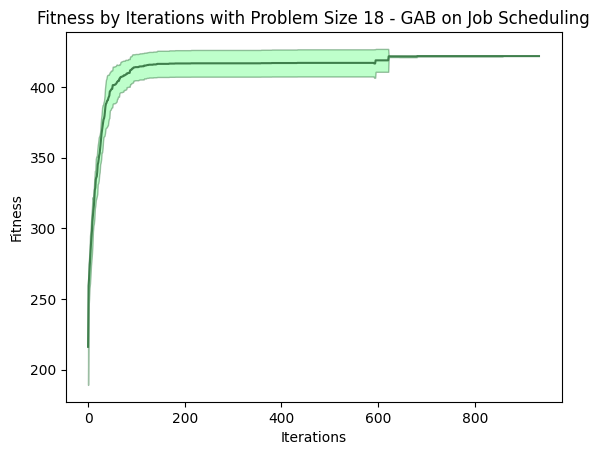

In [59]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - GAB on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [60]:
df_fitness_iter_ffp.avg_fitness.max()

422.0

In [5]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration'] == 400]

,Iteration,avg_fitness,var_fitness
400,400,417.1,91.211111


In [17]:
df_fitness_iter_ffp[(df_fitness_iter_ffp['avg_fitness'] >= 416) & (df_fitness_iter_ffp['avg_fitness'] < 421)].Iteration.min(), df_fitness_iter_ffp[(df_fitness_iter_ffp['avg_fitness'] >= 417) & (df_fitness_iter_ffp['avg_fitness'] < 421)].Iteration.max()

(135, 621)

In [7]:
# elbow analysis
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, S=1.0, curve="concave", direction="increasing")

print(kneedle.knee)

51


In [18]:
df_fitness_iter_ffp[(df_fitness_iter_ffp['Iteration'] >= 135) & (df_fitness_iter_ffp['Iteration'] <= 621)].stddev_fitness.min(), df_fitness_iter_ffp[(df_fitness_iter_ffp['Iteration'] >= 135) & (df_fitness_iter_ffp['Iteration'] <= 621)].stddev_fitness.max()

(8.088792952509753, 10.084366338270547)

In [61]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

18.10739566524623

In [62]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [63]:
# Fevals - iteration

In [5]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [65]:
df_FEvals_iter_ffp.shape

(934, 3)

In [66]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.9,0.100000
2,2,3.4,0.266667
3,3,4.9,0.322222
4,4,6.5,0.500000


In [6]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [7]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
681,681,711.0,13.0,3.605551


In [68]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 4.771442828607154)

In [69]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.9,0.100000,0.316228
2,2,3.4,0.266667,0.516398
3,3,4.9,0.322222,0.567646
4,4,6.5,0.500000,0.707107


Text(0, 0.5, 'FEvals')

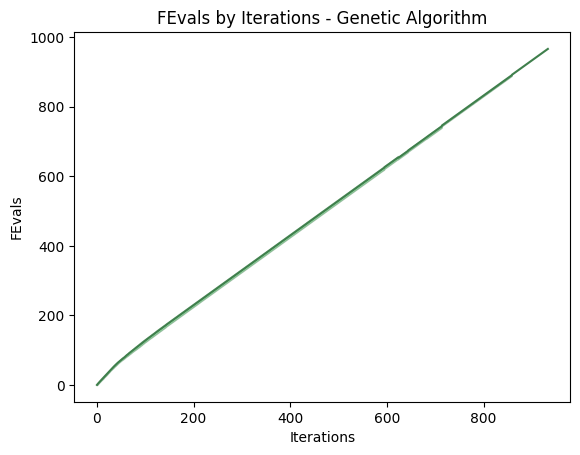

In [70]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [71]:
# fitness - wall clock time

In [8]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [73]:
df_time_iter_ffp.shape

(934, 3)

In [74]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.002031,0.000001
1,1,0.017811,0.000040
2,2,0.033093,0.000101
3,3,0.049308,0.000279
4,4,0.062497,0.000579


In [9]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [10]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_time,var_time,stddev_time
681,681,9.367264,2.874011,1.695291


In [76]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.002031,0.000001,0.001057
1,1,0.017811,0.000040,0.006361
2,2,0.033093,0.000101,0.010067
3,3,0.049308,0.000279,0.016713
4,4,0.062497,0.000579,0.024057


Text(0, 0.5, 'Time')

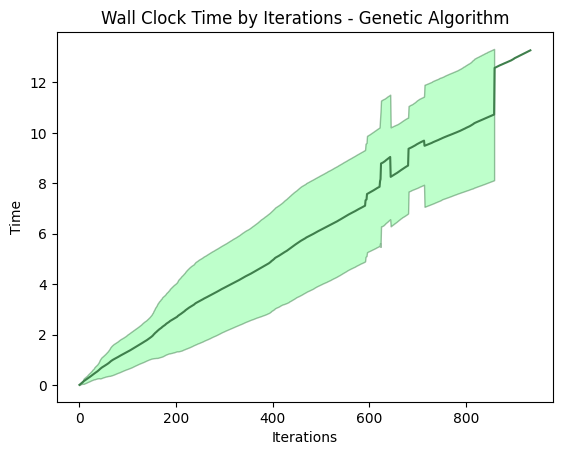

In [77]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [78]:
df_time_iter_ffp.stddev_time.max()

2.687057941506454

In [79]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

623    623
Name: Iteration, dtype: int64

In [80]:
df_time_iter_ffp.avg_time.max()

13.271911632968113